### Very Basic Extraction of Possibly Relevant Quotes

In [74]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
politicians = pd.read_csv("data/politicians.csv")


In [2]:
names = politicians.speaker

In [3]:
words = ['lesbian', 'gay', 'homosexual', 'gender', 'bisexual', 'sexuality', 'same sex'] # obviously add more

In [4]:
politicians

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
690,Texas,Van Taylor
691,Texas,Veronica Escobar
692,Florida,W. Gregory Steube
693,South Carolina,William R. Timmons IV


In [5]:
# only take rows with speakers in the congress or senator files
# only take rows with quotations that contain relevant words
chunk_num = 1
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        
        return chunk.loc[chunk.speaker.isin(names) & (chunk.quotation.str.contains('{}'.format("|".join(words))))]
            
        

with pd.read_json('data/quotes-2015.json.bz2', lines=True, compression='bz2', chunksize=100000) as df_reader:
    for chunk in df_reader:
        processed_chunk = process_chunk(chunk)
        if (chunk_num == 1):
            dataframe15 = processed_chunk
            chunk_num += 1
        else:
            dataframe15 = pd.concat([dataframe15, processed_chunk])
        



KeyboardInterrupt: 

In [23]:
dataframe15=pd.read_csv("data/df15.csv")
merged = pd.merge(dataframe15, politicians, on='speaker', how='inner')
merged=merged.drop(columns=['state_y', 'Unnamed: 0'])
merged.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,state_x
381,2015-09-15-031377,I believe in a woman's right to control her ow...,Bernie Sanders,['Q359442'],2015-09-15 16:00:26,1,"[['Bernie Sanders', '0.8846'], ['None', '0.115...",['http://www.salon.com/2015/09/15/this_is_what...,E,Vermont
301,2015-08-25-093699,The time is long overdue for us to bring our p...,Bernie Sanders,['Q359442'],2015-08-25 07:58:25,1,"[['Bernie Sanders', '0.5659'], ['None', '0.434...",['http://thefederalist.com/2015/08/25/bernie-s...,E,Vermont
500,2015-04-27-066149,You have to have a ridiculous reading of the U...,Marco Rubio,['Q324546'],2015-04-27 22:18:00,29,"[['Marco Rubio', '0.812'], ['None', '0.188']]",['http://nhpr.org/post/3-reasons-republicans-m...,E,Florida
805,2015-04-15-104352,We're trading ideas to try to find a formulati...,Tim Kaine,['Q359888'],2015-04-15 17:17:30,2,"[['Tim Kaine', '0.837'], ['None', '0.1493'], [...",['http://thehill.com/policy/defense/238928-kai...,E,Virginia
113,2015-05-23-057273,"You know, ISIS [ the Islamic State in Iraq and...",Ted Cruz,['Q2036942'],2015-05-23 14:52:42,1,"[['Ted Cruz', '0.7898'], ['None', '0.2102']]",['http://thehill.com/blogs/ballot-box/presiden...,E,Texas
59,2015-12-23-056792,My view on gay marriage is that I'm a constitu...,Ted Cruz,['Q2036942'],2015-12-23 17:03:29,7,"[['Ted Cruz', '0.7387'], ['None', '0.2613']]",['http://www.ijreview.com/2015/12/499924-ted-c...,E,Texas
244,2015-10-14-046630,"I think society is rapidly changing, and if yo...",Rand Paul,['Q463557'],2015-10-14 18:47:43,3,"[['Rand Paul', '0.5589'], ['None', '0.4411']]",['http://www.washingtonblade.com/2015/10/14/ra...,E,Kentucky
329,2015-10-11-003675,and that our gay brothers and sisters should n...,Bernie Sanders,['Q359442'],2015-10-11 00:16:51,1,"[['Bernie Sanders', '0.8835'], ['None', '0.116...",['http://www.wildcat.arizona.edu/article/2015/...,E,Vermont
228,2015-06-27-036319,the Supreme Court has ruled that state bans on...,Lindsey Graham,['Q22212'],2015-06-27 05:00:00,2,"[['Lindsey Graham', '0.6939'], ['None', '0.189...",['http://www.americanthinker.com/blog/2015/06/...,E,South Carolina
268,2015-10-15-049806,I think society is rapidly changing. If you ar...,Rand Paul,['Q463557'],2015-10-15 02:00:58,6,"[['Rand Paul', '0.467'], ['None', '0.4064'], [...",['http://washingtonexaminer.com/media-fail-slo...,E,Kentucky


In [24]:
merged.shape

(844, 10)

In [9]:
merged.quotation.sample(10)

812    We have got to create a framework for this pro...
167    Unfortunately the modern Democratic Party has ...
270    I do worry about a workplace where, every sort...
358    demagogues throughout our history have attempt...
718    Today is a historic day for the U.S. military....
279    Tammy is the first openly gay person to be ele...
380    Look, when Republicans talk about family value...
707    For somebody that is transgender, that gives t...
243    The bad news, for those of us on the suddenly ...
274    America needs to get back to God and God's law...
Name: quotation, dtype: object

In [25]:
merged.state_x.value_counts()

Texas                   198
Vermont                 158
Florida                  91
California               62
Kentucky                 51
Illinois                 31
South Carolina           24
New York                 17
Colorado                 14
Wisconsin                13
Iowa                     12
Washington               12
Arizona                  11
New Jersey               11
Georgia                  11
Ohio                     11
Hawaii                   10
Kansas                    9
Utah                      8
Arkansas                  8
Maine                     8
Virginia                  7
Oregon                    6
Louisiana                 6
Tennessee                 5
Massachusetts             5
Alaska                    5
Oklahoma                  5
Nevada                    4
Maryland                  4
Michigan                  3
Minnesota                 3
Pennsylvania              3
Nebraska                  3
Connecticut               3
District of Columbia

In [34]:
#read hate_crime_2015:
hate_crime=pd.read_csv("data/hatecrime2015.csv")
hate_crime
hate_crime.sort_index()


,State,Agency Type,Agency name,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nIdentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter,Population1
0,Alabama,Total,NaN,8.0,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,Cities,NaN,8.0,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Birmingham,3.0,0,2.0,0.0,0.0,0.0,1.0,1.0,1,2.0,"212,291"
3,NaN,NaN,Hoover,4.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,0.0,"85,163"
4,NaN,NaN,Prattville,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,"35,637"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,3 Includes one incident reported with more tha...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### NAOMIE: (avant c elsa)

In [58]:
#file lgbt population:
lgbtpopulation=pd.read_csv("data/lgbtpopulation2021.csv")

#clean it:
lgbtpopulation=lgbtpopulation.dropna(how='any', axis=0)
lgbtpopulation.groupby("STATE").sum()
lgbtpopulation.sample(10)

,STATE,TOTAL ADULT POPULATION,LGBT ADULT POPULATION,LGBT POPULATION DENSITY,% OF LGBTQ INDIVIDUALS RAISING CHILDREN,% OF SAME-SEX COUPLES RAISING CHILDREN
47,TEXAS,"28,701,845","1,053,000",4.100%,29.00%,19.800%
25,MINNESOTA,"5,611,179","210,000",4.100%,28.00%,16.500%
21,MAINE,"1,338,404","60,000",4.900%,21.00%,13.800%
11,GEORGIA,"10,519,475","425,000",4.500%,27.00%,19.600%
51,VIRGINIA,"8,517,685","308,000",3.900%,26.00%,16.00%
53,WEST VIRGINIA,"1,805,832","68,000",4.00%,31.00%,17.800%
33,NEW MEXICO,"2,095,428","85,000",4.500%,29.00%,17.800%
50,VERMONT,"626,299","30,000",5.200%,23.00%,18.600%
36,NORTH DAKOTA,"760,077","20,000",2.700%,10.0%,21.600%
16,INDIANA,"6,691,878","272,000",4.500%,34.00%,18.900%


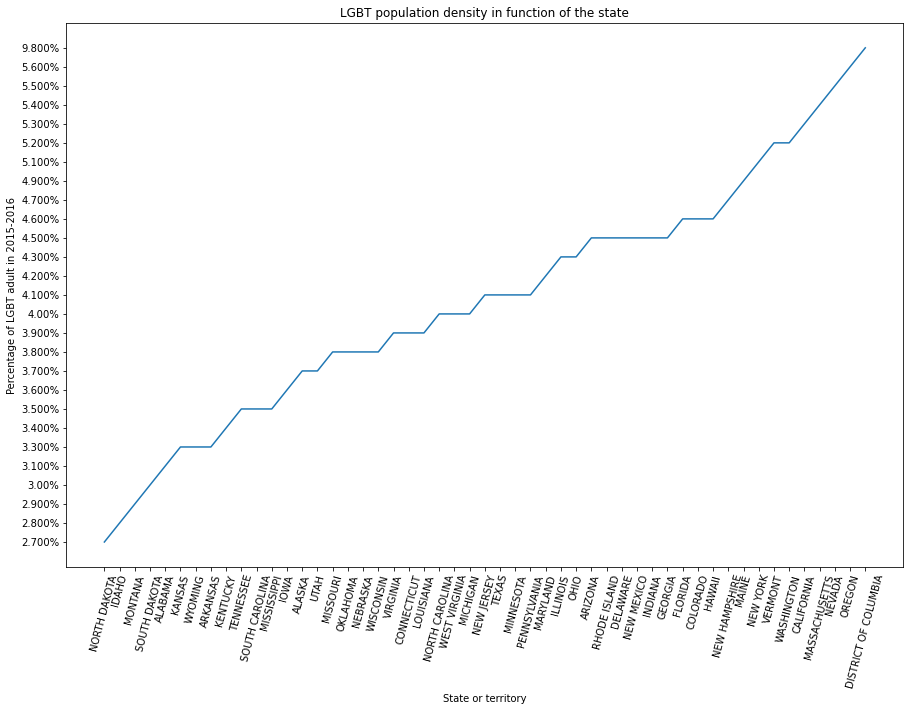

In [124]:
lgbtpopulation=lgbtpopulation.sort_values(by=['LGBT POPULATION DENSITY'], axis=0)
plt.figure(figsize=(15,10))
plt.plot(lgbtpopulation['STATE'], lgbtpopulation['LGBT POPULATION DENSITY'])
plt.title("LGBT population density in function of the state")
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.show()

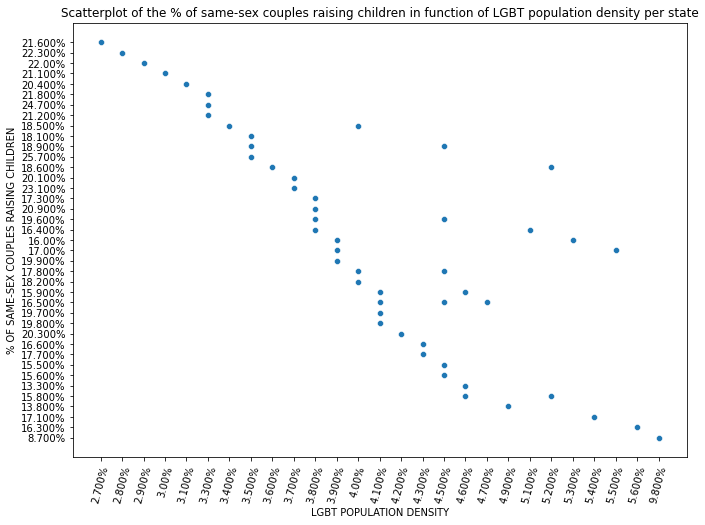

In [85]:
#Correlation between LGBT population density and % OF SAME-SEX COUPLES RAISING CHILDREN??
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)
plt.xticks(rotation=75)
sns.scatterplot(data=lgbtpopulation, x='LGBT POPULATION DENSITY', y='% OF SAME-SEX COUPLES RAISING CHILDREN', ax=ax).set(title="Scatterplot of the % of same-sex couples raising children in function of LGBT population density per state") 
plt.show()

We will discuss it later, here we are just doing some pre-processing steps and visualizations but it seems that we have a correlation between these two categories.

In [116]:
#file lgbtsummary
lgbtsummary=pd.read_csv("data/lgbtsummary.csv")
lgbtsummary=lgbtsummary[:-1] #remove last row to sort by increasing population rank
lgbtsummary=lgbtsummary[['Pop.rank', 'State or territory', '2015–2016 LGBTadult percentageestimate[7]', '2016 transgender adult percentage estimate[2]']]
lgbtsummary=lgbtsummary.rename(columns={"2015–2016 LGBTadult percentageestimate[7]": "Percentage of LGBT adult in 2015-2016", "2016 transgender adult percentage estimate[2]": "Percentage of transgender adult in 2016"})
lgbtsummary.head(lgbtsummary.shape[0]) 


,Pop.rank,State or territory,Percentage of LGBT adult in 2015-2016,Percentage of transgender adult in 2016
0,1,California,4.8%,0.76%
1,2,Texas,3.6%,0.66%
2,3,New York,4.5%,0.51%
3,4,Florida,4.2%,0.66%
4,5,Illinois,3.7%,0.51%
5,6,Ohio,3.8%,0.45%
6,7,Michigan,3.8%,0.43%
7,8,Georgia,4.0%,0.75%
8,9,Pennsylvania,3.6%,0.44%
9,10,New Jersey,3.6%,0.44%


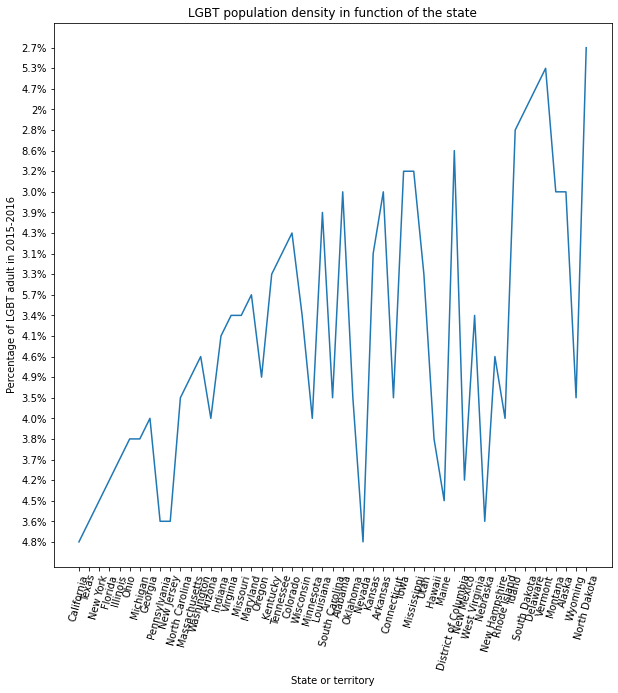

In [122]:
#visualizations:
plt.figure(figsize=(10,10))
plt.plot(lgbtsummary['State or territory'],lgbtsummary['Percentage of LGBT adult in 2015-2016'])
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.title("LGBT population density in function of the state")
plt.show()

#### can do the same for each year...

In [27]:
dataframe20=pd.read_csv("data/df20.csv")
merged = pd.merge(dataframe20, politicians, on='speaker', how='inner')
merged20=merged.drop(columns=['state_y', 'Unnamed: 0'])
merged20.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,state_x
139,2020-01-27-005290,"And they're starting to think, `Could this rea...",Bernie Sanders,['Q359442'],2020-01-27 05:00:00,2,"[['Bernie Sanders', '0.5458'], ['None', '0.250...",['http://commondreams.org/news/2020/01/27/lead...,E,Vermont
28,2020-02-20-095857,women fat broads and horse faced lesbians.,Elizabeth Warren,['Q434706'],2020-02-20 02:53:17,3,"[['Elizabeth Warren', '0.8206'], ['None', '0.1...",['http://wsfa.com/2020/02/19/rivals-take-pre-d...,E,Massachusetts
266,2020-02-17-057861,"that it's open to all, regardless of religion,...",Eddie Bernice Johnson,['Q461526'],2020-02-17 10:46:54,1,"[['Eddie Bernice Johnson', '0.8543'], ['None',...",['https://www.nbcdfw.com/news/local/dart-renam...,E,Texas
7,2020-02-20-057983,running against a billionaire who calls women ...,Elizabeth Warren,['Q434706'],2020-02-20 02:36:09,1,"[['Elizabeth Warren', '0.919'], ['None', '0.07...",['https://kvia.com/your-voice-your-vote/politi...,E,Massachusetts
146,2020-01-18-013699,I could say a lot of bad things about Trump an...,Bernie Sanders,['Q359442'],2020-01-18 21:48:50,2,"[['Bernie Sanders', '0.7919'], ['None', '0.161...",['https://www.seacoastonline.com/news/20200118...,E,Vermont
259,2020-01-14-006380,"As a proud, progressive voice in Washington, J...",Mark Pocan,['Q1900355'],2020-01-14 17:19:47,1,"[['Mark Pocan', '0.5979'], ['None', '0.2034'],...",['https://www.bostonmagazine.com/news/2020/01/...,E,Wisconsin
191,2020-03-05-063254,The fact that I am gay is just one of those th...,Aaron Schock,"['Q24705735', 'Q302659']",2020-03-05 16:48:45,8,"[['Aaron Schock', '0.5203'], ['None', '0.4797']]",['http://feeds.towleroad.com/~r/towleroad/feed...,E,Illinois
33,2020-02-25-000987,a history now of harassing women and of gender...,Elizabeth Warren,['Q434706'],2020-02-25 18:27:54,1,"[['Elizabeth Warren', '0.7739'], ['None', '0.2...",['https://www.washingtonexaminer.com/news/one-...,E,Massachusetts
233,2020-02-12-057732,It's the same job as if he was a different gen...,Jared Polis,['Q935734'],2020-02-12 12:46:24,2,"[['Jared Polis', '0.6738'], ['None', '0.3051']...",['https://www.washingtonblade.com/2020/02/12/c...,E,Colorado
19,2020-02-04-010414,"black trans & cis women, gender non-conforming...",Elizabeth Warren,['Q434706'],2020-02-04 06:00:00,2,"[['Elizabeth Warren', '0.5469'], ['None', '0.4...",['https://www.americanthinker.com/blog/2020/02...,E,Massachusetts
